In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px

In [9]:
# Load the csv file of the clean data
df = pd.read_csv('data\\processed\\bulk_cancellations_cleaned.csv')
dfbr = pd.read_csv('data\\processed\\bulk_sales_cleaned.csv')
dfr = pd.read_csv('data\\processed\\retail_cleaned.csv')

In [11]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,C489563,90085,CRYSTAL STILETTO PHONE CHARM,81,2009-12-01 13:09:00,0.85,13526,United Kingdom
1,C489713,21094,SET/6 RED SPOTTY PAPER PLATES,150,2009-12-02 10:55:00,0.64,12755,Japan
2,C490133,72045D,ROSES ON BLUE TEACUP CANDLE,504,2009-12-03 18:36:00,1.69,17949,United Kingdom
3,C490133,20971,PINK BLUE FELT CRAFT TRINKET BOX,600,2009-12-03 18:36:00,1.06,17949,United Kingdom
4,C490133,21314,SMALL GLASS HEART TRINKET POT,504,2009-12-03 18:36:00,1.85,17949,United Kingdom
...,...,...,...,...,...,...,...,...
626,C580913,22536,MAGIC DRAWING SLATE PURDEY,120,2011-12-06 13:41:00,0.36,17857,United Kingdom
627,C580971,22313,OFFICE MUG WARMER PINK,250,2011-12-06 15:04:00,2.55,14298,United Kingdom
628,C581330,16169E,WRAP 50'S CHRISTMAS,100,2011-12-08 11:57:00,0.42,15877,United Kingdom
629,C581462,21642,ASSORTED TUTTI FRUTTI PEN,72,2011-12-08 18:51:00,0.29,12985,United Kingdom


In [13]:
#bulk Cancellation Rate per bulk orders
cancelled_bulk_orders = df['Invoice'].nunique()
valid_bulk_orders = dfbr['Invoice'].nunique() 
print(cancelled_bulk_orders, valid_bulk_orders)

275 8504


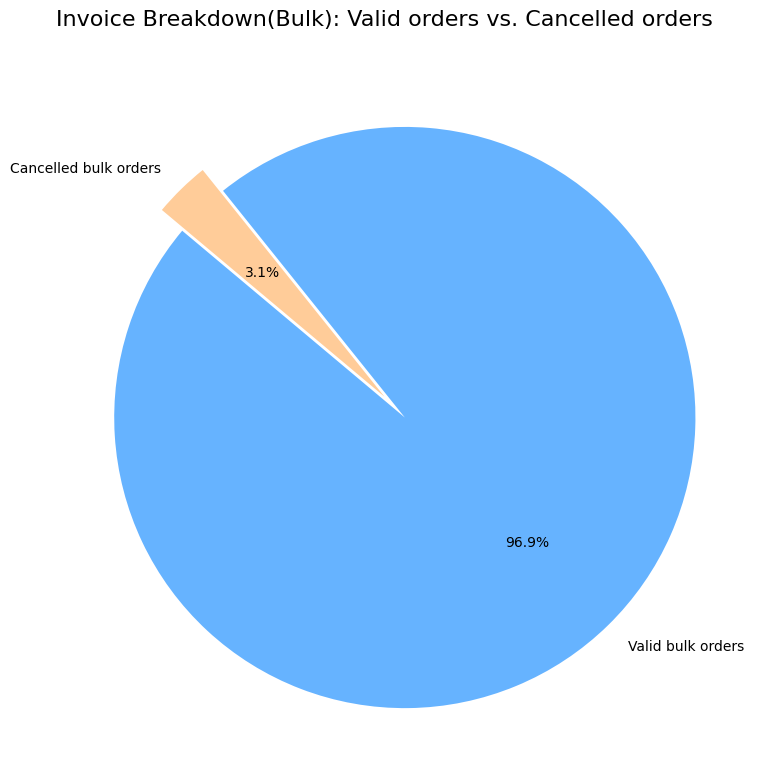

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(
    [valid_bulk_orders, cancelled_bulk_orders],
    labels=['Valid bulk orders', 'Cancelled bulk orders'],
    autopct='%1.1f%%', 
    startangle=140,    
    colors=['#66b3ff', '#ffcc99'], 
    explode=(0.1, 0)    
)
plt.title('Invoice Breakdown(Bulk): Valid orders vs. Cancelled orders', fontsize=16)
plt.tight_layout()
plt.savefig('graphs\\Invoice Breakdown(Bulk) Valid orders vs Cancelled orders')
plt.show()

In [17]:
Cancellation_bulk_Rate = cancelled_bulk_orders/(valid_bulk_orders+cancelled_bulk_orders) *100
print("cancelation rate is", Cancellation_bulk_Rate,"%")

cancelation rate is 3.1324752249686756 %


In [19]:
#avrage transaction count per bulk order
#cancellations
avg_trans_per_bulk_cancellation = df.groupby('Invoice').size().mean()
print(avg_trans_per_bulk_cancellation)

2.2945454545454544


In [21]:
#valid orders
avg_trans_per_bulk_order = dfbr.groupby('Invoice').size().mean()
print(avg_trans_per_bulk_order)

2.8633584195672626


In [23]:
#adjusted cancellation rate 
adjusted_bulk_cancellation_Rate = (cancelled_bulk_orders*avg_trans_per_bulk_cancellation)/((valid_bulk_orders*avg_trans_per_bulk_order)+(cancelled_bulk_orders*avg_trans_per_bulk_cancellation)) *100
print(adjusted_bulk_cancellation_Rate)

2.5259196989712183


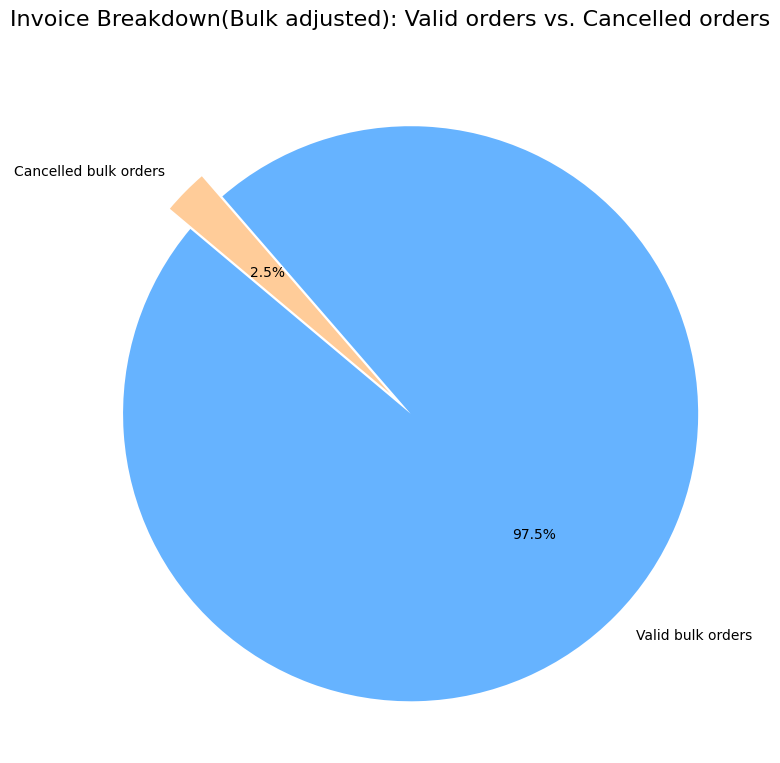

In [25]:
plt.figure(figsize=(8, 8))
plt.pie(
    [100-adjusted_bulk_cancellation_Rate, adjusted_bulk_cancellation_Rate],
    labels=['Valid bulk orders', 'Cancelled bulk orders'],
    autopct='%1.1f%%', 
    startangle=140,    
    colors=['#66b3ff', '#ffcc99'], 
    explode=(0.1, 0)    
)
plt.title('Invoice Breakdown(Bulk adjusted): Valid orders vs. Cancelled orders', fontsize=16)
plt.tight_layout()
plt.show()

In [27]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
dfbr['InvoiceDate'] = pd.to_datetime(dfbr['InvoiceDate'])
dfbr['Month'] = dfbr['InvoiceDate'].dt.to_period('M')

In [29]:
#Cancellation Rate by Month
cancelled_monthly_orders = df.groupby('Month')['Invoice'].nunique()
monthly_orders = dfbr.groupby('Month')['Invoice'].nunique()
cancelled_monthly_orders_rate = cancelled_monthly_orders/(cancelled_monthly_orders + monthly_orders) * 100
cancelled_monthly_orders_rate

Month
2009-12    3.170732
2010-01    2.049180
2010-02    3.018868
2010-03    3.055556
2010-04    2.821317
2010-05    4.312668
2010-06    2.816901
2010-07    3.021148
2010-08    2.994012
2010-09    2.650602
2010-10    3.555556
2010-11    3.799655
2010-12    3.716216
2011-01    2.978723
2011-02    2.358491
2011-03    2.348993
2011-04    4.016064
2011-05    2.318841
2011-06    3.048780
2011-07    3.954802
2011-08    3.215434
2011-09    2.961276
2011-10    3.267974
2011-11    3.015873
2011-12    2.631579
Freq: M, Name: Invoice, dtype: float64

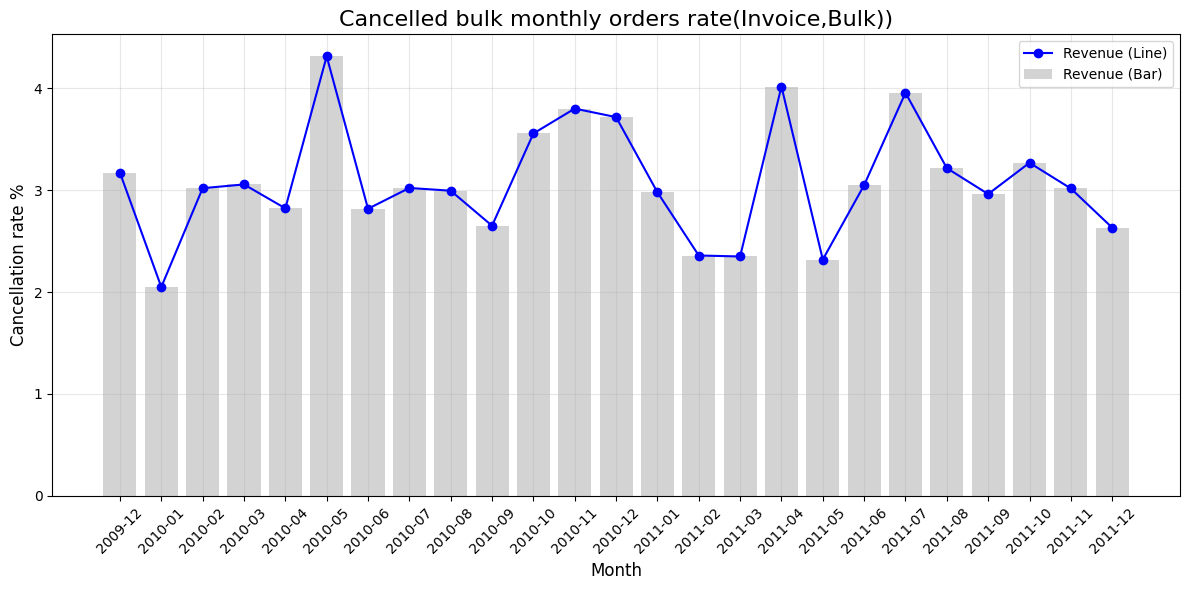

In [31]:
plt.figure(figsize=(12, 6))
plt.bar(cancelled_monthly_orders_rate.index.astype(str), cancelled_monthly_orders_rate.values, color='lightgray', label='Revenue (Bar)')
plt.plot(cancelled_monthly_orders_rate.index.astype(str), cancelled_monthly_orders_rate.values, marker='o', color='b', label='Revenue (Line)')
plt.title('Cancelled bulk monthly orders rate(Invoice,Bulk))', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cancellation rate %', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('graphs\\Cancelled monthly orders rate(Invoice,Bulk)')
plt.show()

In [32]:
#adjusted Cancellation Rate by Month
avg_trans_per_cancellation_by_month = df.groupby(['Month','Invoice']).size().mean()
print(avg_trans_per_cancellation_by_month)
avg_trans_per_order_by_month = dfbr.groupby(['Month','Invoice']).size().mean()
print(avg_trans_per_order_by_month)
adjusted_cancelled_monthly_orders_rate = (cancelled_monthly_orders*avg_trans_per_cancellation_by_month)/((cancelled_monthly_orders*avg_trans_per_cancellation_by_month) + (monthly_orders*avg_trans_per_order_by_month)) * 100
adjusted_cancelled_monthly_orders_rate

2.2945454545454544
2.8633584195672626


Month
2009-12    2.556964
2010-01    1.648818
2010-02    2.433758
2010-03    2.463516
2010-04    2.273598
2010-05    3.485810
2010-06    2.270020
2010-07    2.435607
2010-08    2.413600
2010-09    2.135297
2010-10    2.869504
2010-11    3.068002
2010-12    3.000129
2011-01    2.401202
2011-02    1.898867
2011-03    1.891185
2011-04    3.244145
2011-05    1.866797
2011-06    2.458020
2011-07    3.194267
2011-08    2.593245
2011-09    2.387053
2011-10    2.635895
2011-11    2.431329
2011-12    2.119892
Freq: M, Name: Invoice, dtype: float64

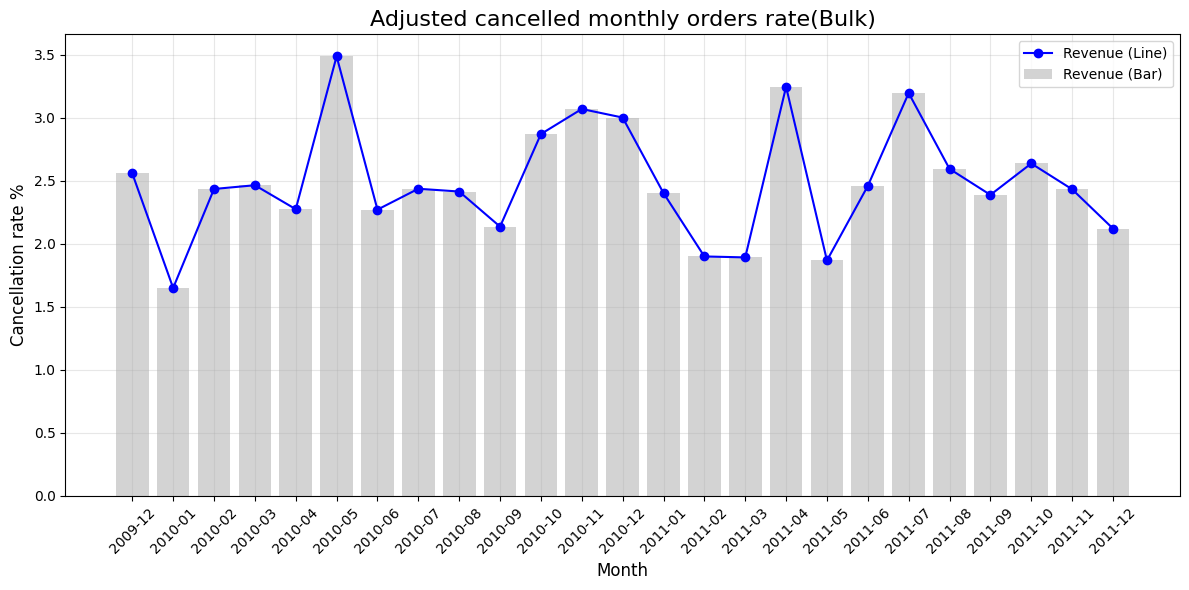

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(adjusted_cancelled_monthly_orders_rate.index.astype(str), adjusted_cancelled_monthly_orders_rate.values, color='lightgray', label='Revenue (Bar)')
plt.plot(adjusted_cancelled_monthly_orders_rate.index.astype(str), adjusted_cancelled_monthly_orders_rate.values, marker='o', color='b', label='Revenue (Line)')
plt.title('Adjusted cancelled monthly orders rate(Bulk)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cancellation rate %', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('graphs\\Adjusted cancelled monthly orders rate(Invoice,Bulk))')
plt.show()

In [36]:
filtered_df = df[df['Month'] != '2009-12']
filtered_dfbr = dfbr[dfbr['Month'] != '2009-12']

In [39]:
filtered_df['Quarter'] = filtered_df['InvoiceDate'].dt.to_period('Q')
filtered_dfbr['Quarter'] = filtered_dfbr['InvoiceDate'].dt.to_period('Q')

C:\Users\user\AppData\Local\Temp\ipykernel_15636\1634859675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Quarter'] = filtered_df['InvoiceDate'].dt.to_period('Q')
C:\Users\user\AppData\Local\Temp\ipykernel_15636\1634859675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dfbr['Quarter'] = filtered_dfbr['InvoiceDate'].dt.to_period('Q')


In [41]:
#Cancellation Rate by quarter
cancelled_quarterly_orders = filtered_df.groupby('Quarter')['Invoice'].nunique()
quarterly_orders = filtered_dfbr.groupby('Quarter')['Invoice'].nunique()
cancelled_quarterly_orders_rate = cancelled_quarterly_orders/(cancelled_quarterly_orders + quarterly_orders) * 100
cancelled_quarterly_orders_rate

Quarter
2010Q1    2.761795
2010Q2    3.349282
2010Q3    2.870370
2010Q4    3.698113
2011Q1    2.550336
2011Q2    3.036876
2011Q3    3.351449
2011Q4    3.049257
Freq: Q-DEC, Name: Invoice, dtype: float64

In [43]:
#adjusted Cancellation Rate by Month
avg_trans_per_cancellation_by_quarter = filtered_df.groupby(['Quarter','Invoice']).size().mean()
print(avg_trans_per_cancellation_by_quarter)
avg_trans_per_order_by_quarter = filtered_dfbr.groupby(['Quarter','Invoice']).size().mean()
print(avg_trans_per_order_by_quarter)
adjusted_cancelled_quarterly_orders_rate = (cancelled_quarterly_orders*avg_trans_per_cancellation_by_quarter)/((cancelled_quarterly_orders*avg_trans_per_cancellation_by_quarter) + (quarterly_orders*avg_trans_per_order_by_quarter)) * 100
adjusted_cancelled_quarterly_orders_rate

2.301526717557252
2.8815838164549157


Quarter
2010Q1    2.218183
2010Q2    2.693236
2010Q3    2.305894
2010Q4    2.975843
2011Q1    2.047469
2011Q2    2.440478
2011Q3    2.694991
2011Q4    2.450489
Freq: Q-DEC, Name: Invoice, dtype: float64

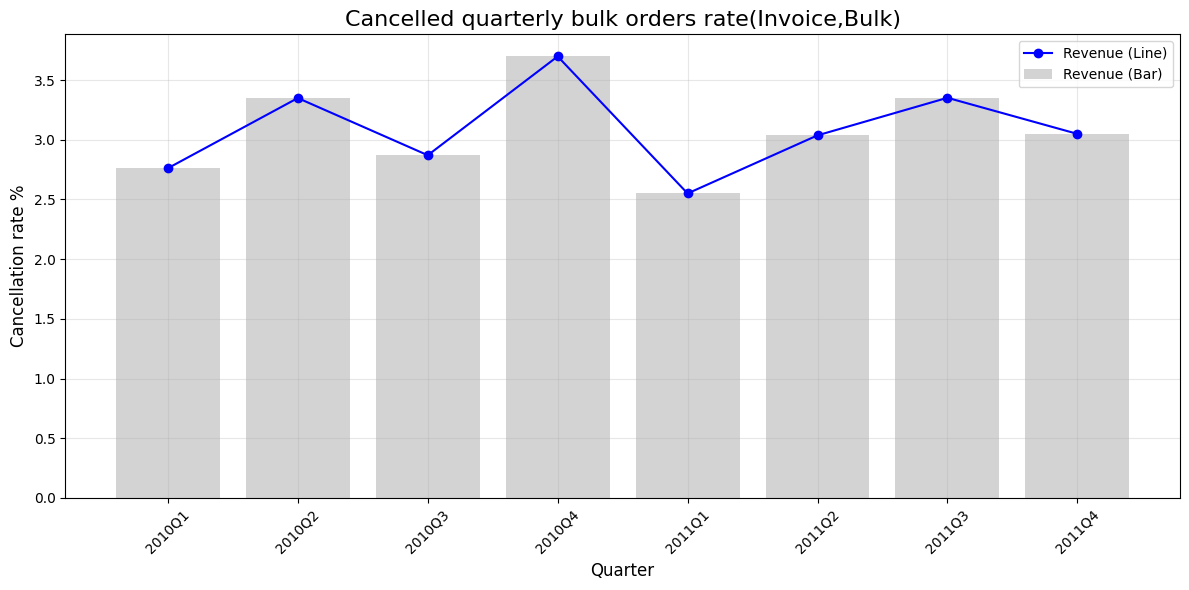

In [45]:
plt.figure(figsize=(12, 6))
plt.bar(cancelled_quarterly_orders_rate.index.astype(str), cancelled_quarterly_orders_rate.values, color='lightgray', label='Revenue (Bar)')
plt.plot(cancelled_quarterly_orders_rate.index.astype(str), cancelled_quarterly_orders_rate.values, marker='o', color='b', label='Revenue (Line)')
plt.title('Cancelled quarterly bulk orders rate(Invoice,Bulk)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Cancellation rate %', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('graphs\\Cancelled quarterly bulk orders rate(Invoice,Bulk)')
plt.show()

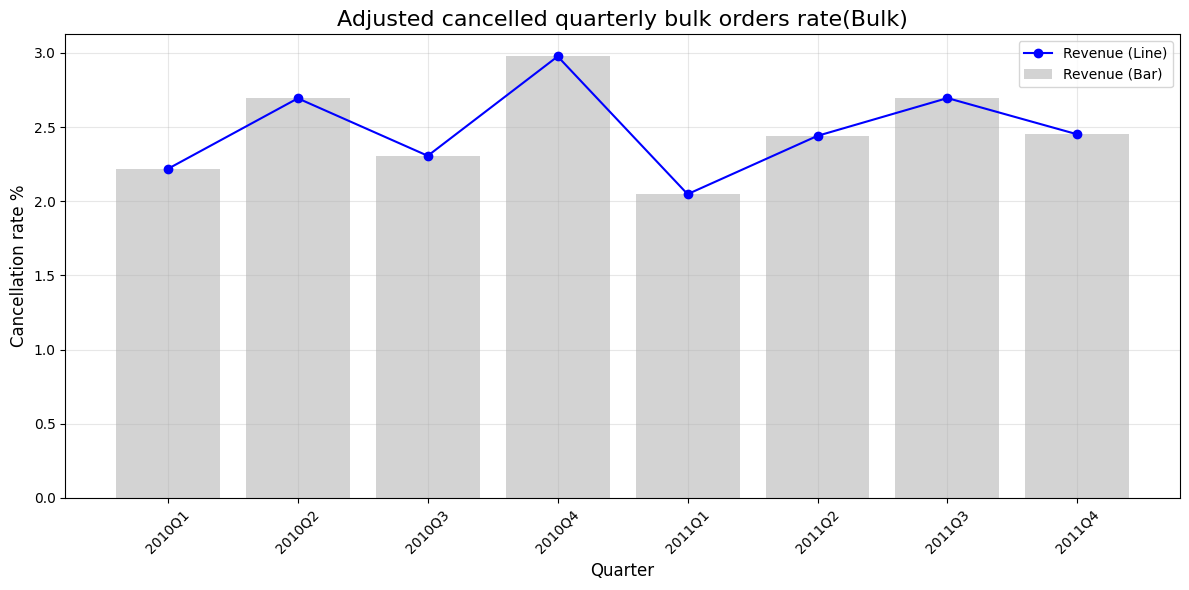

In [47]:
plt.figure(figsize=(12, 6))
plt.bar(adjusted_cancelled_quarterly_orders_rate.index.astype(str), adjusted_cancelled_quarterly_orders_rate.values, color='lightgray', label='Revenue (Bar)')
plt.plot(adjusted_cancelled_quarterly_orders_rate.index.astype(str), adjusted_cancelled_quarterly_orders_rate.values, marker='o', color='b', label='Revenue (Line)')
plt.title('Adjusted cancelled quarterly bulk orders rate(Bulk)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Cancellation rate %', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('graphs\\Adjusted cancelled quarterly bulk orders rate(Invoice,Bulk)')
plt.show()

In [49]:
bulk_cancellation_by_product = df.groupby('StockCode').size()
valid_bulk_orders_by_product = dfbr.groupby('StockCode').size()

In [51]:
#Cancellation by Product
bulk_cancellation_by_product.sort_values(ascending=False)

StockCode
85099B    8
20829     6
20725     6
85123A    5
75049L    5
         ..
22090     1
22089     1
22087     1
22083     1
90167     1
Length: 423, dtype: int64

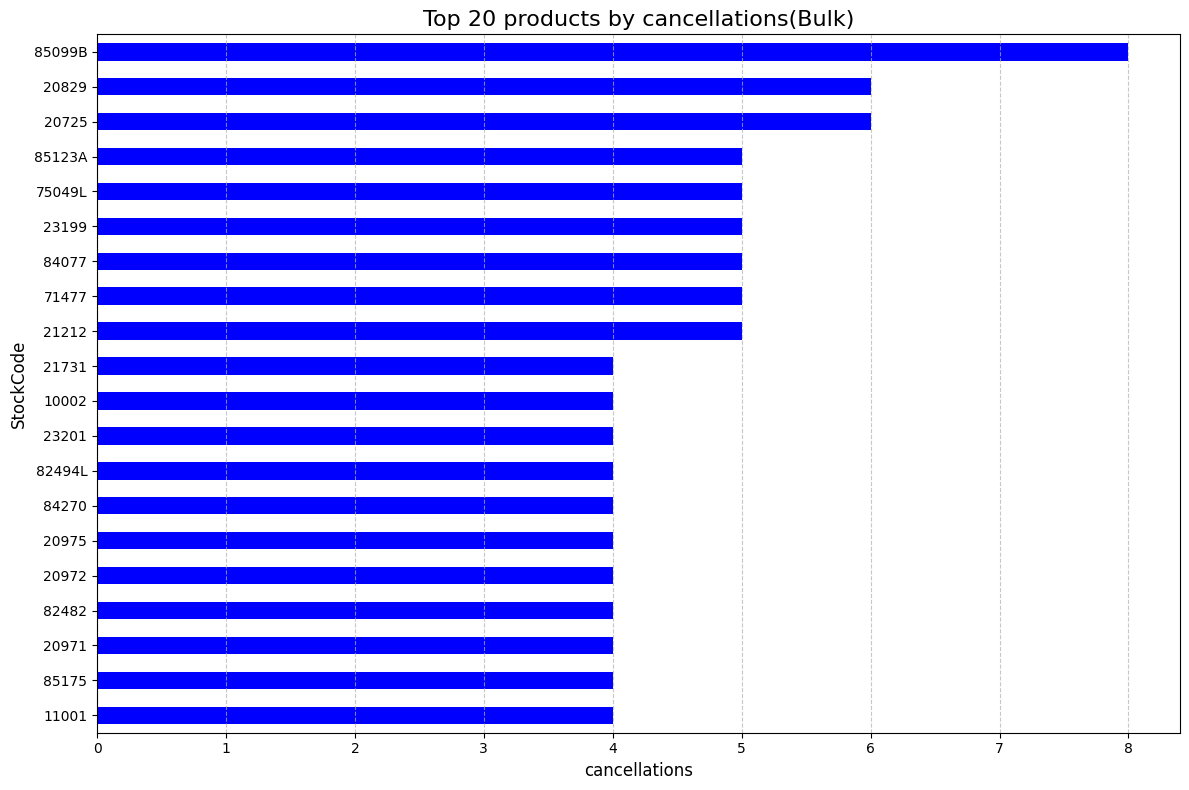

In [53]:
plt.figure(figsize=(12, 8))
bulk_cancellation_by_product.sort_values(ascending=False).head(20)[::-1].plot(kind='barh', color='blue')
plt.title('Top 20 products by cancellations(Bulk)', fontsize=16)
plt.xlabel('cancellations', fontsize=12)
plt.ylabel('StockCode', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graphs\\Top 20 products by cancellations(Bulk)')
plt.show()

In [55]:
#Cancellation by Product_rate
cancellation_by_product_rate = bulk_cancellation_by_product / ( valid_bulk_orders_by_product+bulk_cancellation_by_product)*100
cancellation_by_product_rate.dropna(inplace=True)
cancellation_by_product_rate.sort_values(ascending=False).head(20)

StockCode
10138     66.666667
85174     66.666667
20865     50.000000
22389     50.000000
22990     50.000000
84919     50.000000
23113     50.000000
22673     50.000000
20715     50.000000
84601A    50.000000
23843     50.000000
23004     50.000000
20840     50.000000
21849     50.000000
22313     50.000000
79323W    50.000000
23055     42.857143
23056     42.857143
23057     42.857143
22670     40.000000
dtype: float64

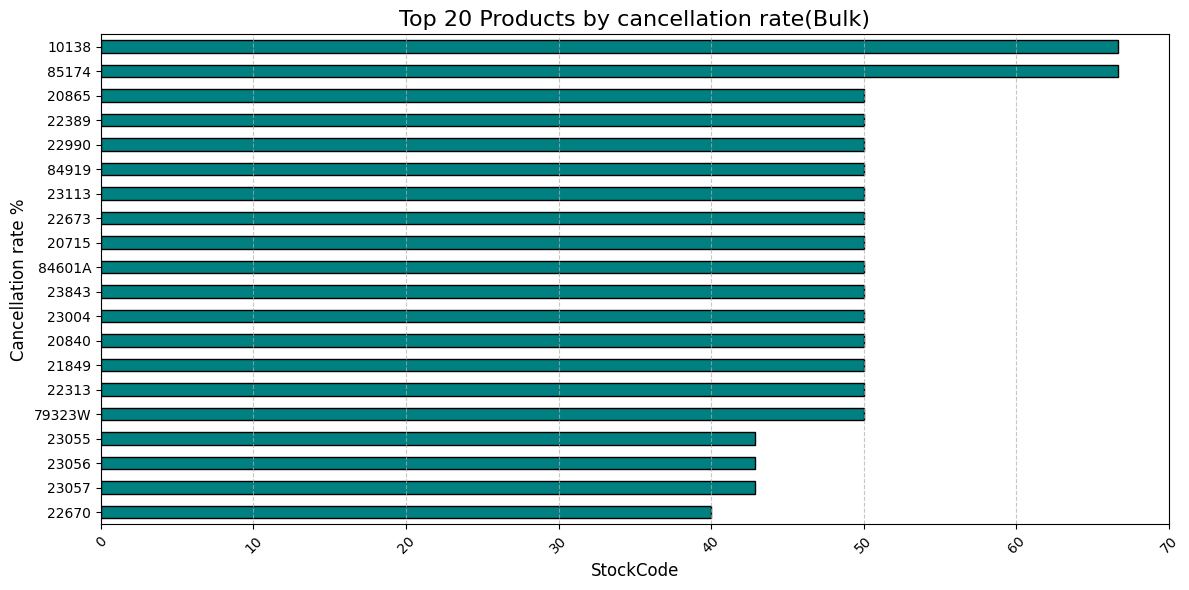

In [57]:
plt.figure(figsize=(12, 6))
cancellation_by_product_rate.sort_values(ascending=False).head(20)[::-1].plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 20 Products by cancellation rate(Bulk)', fontsize=16)
plt.xlabel('StockCode', fontsize=12)
plt.ylabel('Cancellation rate %', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graphs\\Top 20 Products by cancellation rate(Bulk)')
plt.show()

In [59]:
bulk_cancellation_by_customer = df.groupby('Customer ID')['Invoice'].nunique()
valid_bulk_orders_by_customer = dfr.groupby('Customer ID')['Invoice'].nunique()

In [61]:
bulk_cancellation_by_customer.sort_values(ascending=False).head(20)

Customer ID
12931      9
13694      9
17949      9
14156      6
16684      6
16754      5
14911      5
15061      4
16013      4
14646      4
16422      4
Unknown    4
12901      4
14031      3
14607      3
14680      3
13798      3
12748      3
15769      3
17307      3
Name: Invoice, dtype: int64

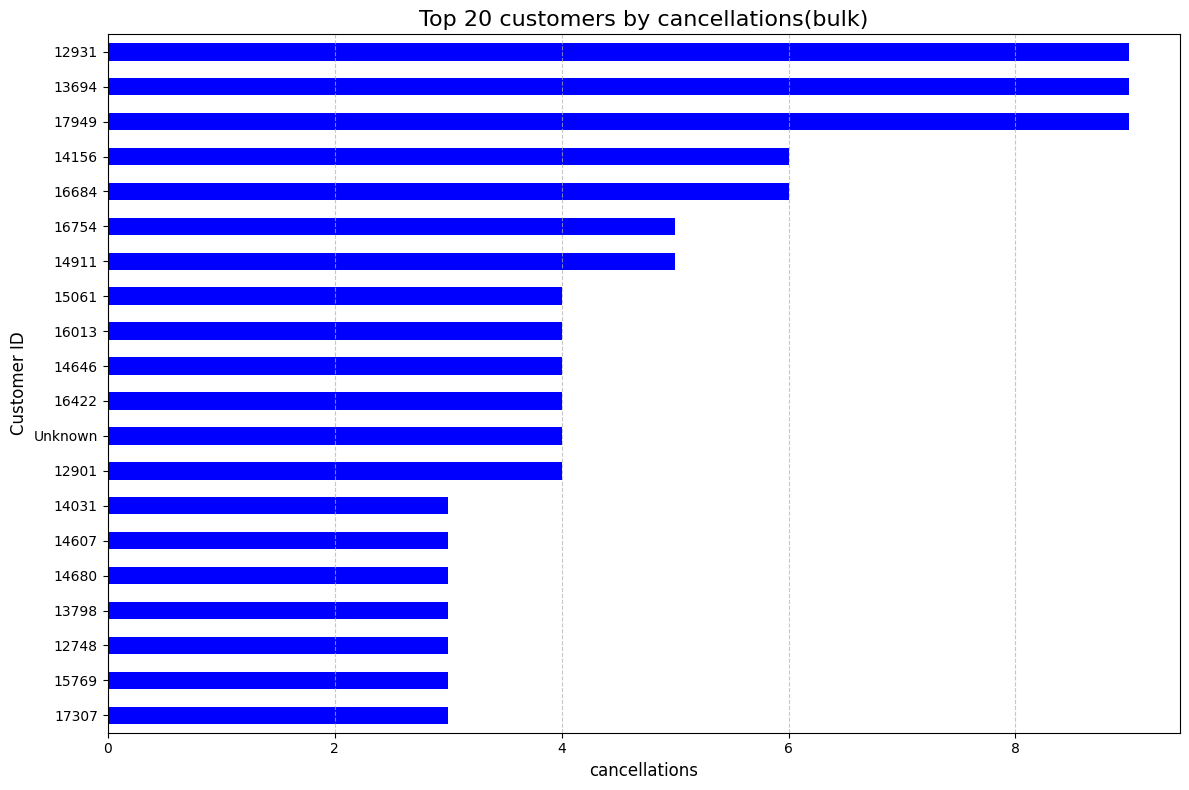

In [63]:
plt.figure(figsize=(12, 8))
bulk_cancellation_by_customer.sort_values(ascending=False).head(20)[::-1].plot(kind='barh', color='blue')
plt.title('Top 20 customers by cancellations(bulk)', fontsize=16)
plt.xlabel('cancellations', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graphs\\Top 20 customers by cancellations(bulk)')
plt.show()

In [65]:
#Cancellation by customer rate
cancellation_by_customer_rate = bulk_cancellation_by_customer / ( valid_bulk_orders_by_customer+bulk_cancellation_by_customer)
cancellation_by_customer_rate.dropna(inplace=True)
cancellation_by_customer_rate.sort_values(ascending=False)

Customer ID
16754      0.555556
16077      0.500000
16446      0.500000
13091      0.500000
18084      0.500000
             ...   
12748      0.009288
12971      0.008772
13089      0.005128
17841      0.004717
Unknown    0.000931
Name: Invoice, Length: 163, dtype: float64

In [67]:
#Cancellation by customer rate adjusted
cancellation_by_customer_rate = (bulk_cancellation_by_customer*avg_trans_per_bulk_cancellation) / ( (valid_bulk_orders_by_customer*avg_trans_per_bulk_order)+(bulk_cancellation_by_customer*avg_trans_per_bulk_cancellation)) *100
cancellation_by_customer_rate.dropna(inplace=True)
cancellation_by_customer_rate.sort_values(ascending=False).head(20)

Customer ID
16754    50.042078
16077    44.486007
16446    44.486007
13091    44.486007
18084    44.486007
15098    44.486007
12773    44.486007
14195    44.486007
13902    44.486007
16716    44.486007
12454    37.539456
17949    34.000023
12346    28.605790
14609    28.605790
16900    28.605790
15877    28.605790
13526    28.605790
17011    28.605790
17857    28.605790
12985    28.605790
Name: Invoice, dtype: float64

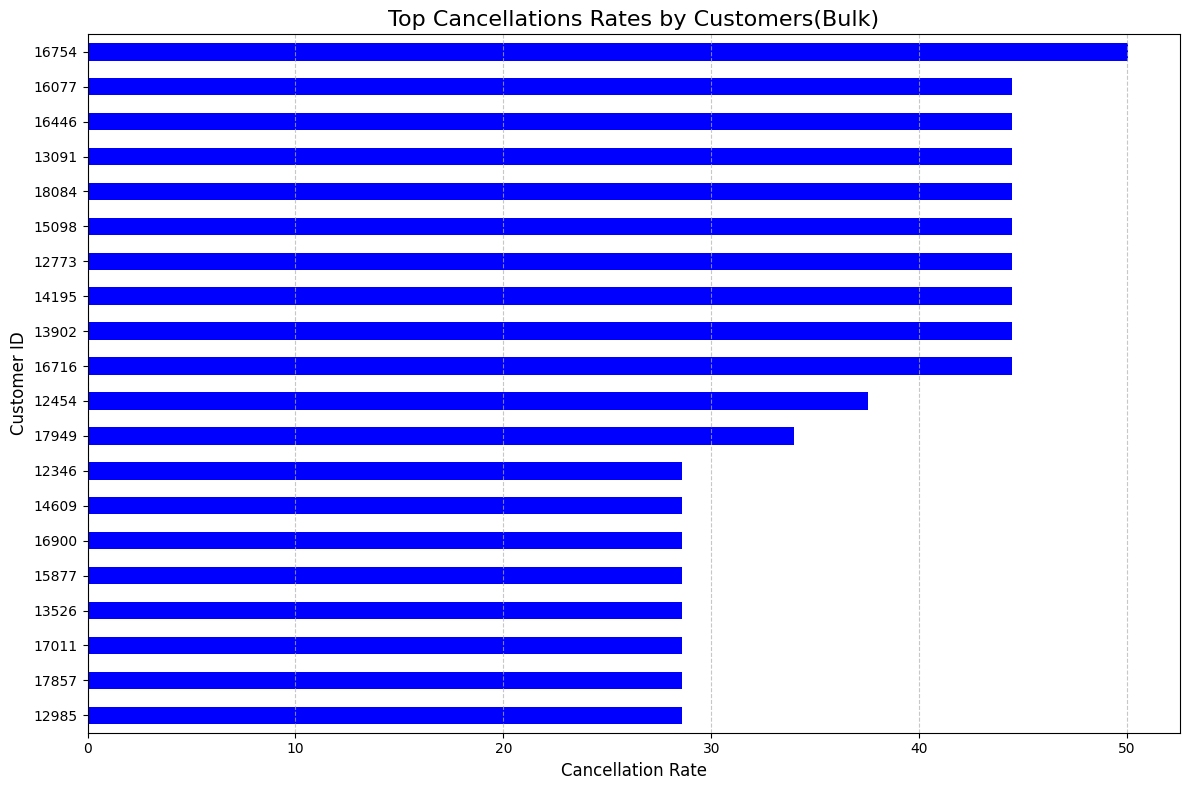

In [69]:
plt.figure(figsize=(12, 8))
cancellation_by_customer_rate.sort_values(ascending=False).head(20)[::-1].plot(kind='barh', color='blue')
plt.title('Top Cancellations Rates by Customers(Bulk)', fontsize=16)
plt.xlabel('Cancellation Rate', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graphs\\Top 20 Cancellations Rates by Customers(Bulk)')
plt.show()

In [71]:
#Revenue Lost to Cancellations
df['Revenue'] = df['Quantity'] * df['Price']
Cancellation_lost_revenue = df['Revenue'].sum()
print(f"Total cancellations lost Revenue: {Cancellation_lost_revenue:.2f}£")

Total cancellations lost Revenue: 456833.69£


In [73]:
#total bulk revenue
dfbr['Revenue'] = dfbr['Quantity'] * dfbr['Price']
bulk_revenue = dfbr['Revenue'].sum()
print(f"Total bulk Revenue: {bulk_revenue:.2f}£")

Total bulk Revenue: 5802651.11£


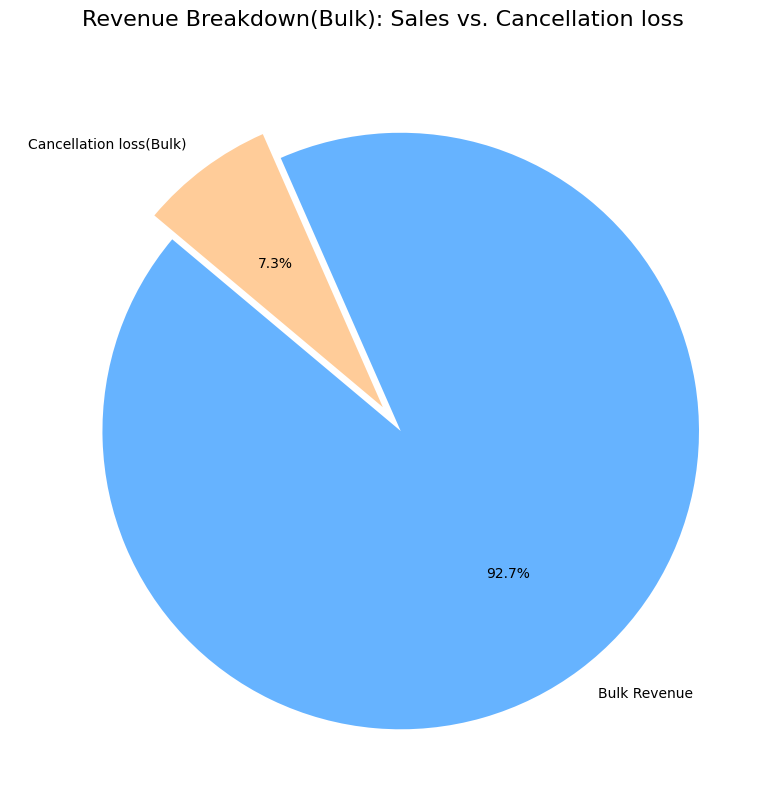

In [75]:
plt.figure(figsize=(8, 8))
plt.pie(
    [bulk_revenue, Cancellation_lost_revenue],
    labels=['Bulk Revenue', 'Cancellation loss(Bulk)'],
    autopct='%1.1f%%', 
    startangle=140,    
    colors=['#66b3ff', '#ffcc99'], 
    explode=(0.1, 0)    
)
plt.title('Revenue Breakdown(Bulk): Sales vs. Cancellation loss', fontsize=16)
plt.tight_layout()
plt.savefig('graphs\\Revenue Breakdown(Bulk) Sales vs Cancellation loss')
plt.show()